In [0]:
# Bitcoin analysis

In [0]:
import numpy as np
import pandas as pd


In [3]:
from google.colab import files
uploaded = files.upload()

Saving BTC_USD_2019-03-25_2020-03-24-CoinDesk.csv to BTC_USD_2019-03-25_2020-03-24-CoinDesk.csv


In [5]:
df_btc = pd.read_csv('BTC_USD_2019-03-25_2020-03-24-CoinDesk.csv')
df_btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-03-25,3968.438701,3977.707443,3990.965292,3940.879744
1,BTC,2019-03-26,3913.781717,3972.696582,3982.232764,3903.293930
2,BTC,2019-03-27,3915.375320,3913.781742,3928.979427,3876.720858
3,BTC,2019-03-28,4018.590510,3925.865359,4030.357641,3914.577708
4,BTC,2019-03-29,4008.370872,4018.590510,4033.386524,3990.008616


In [6]:
df = pd.DataFrame({'BTC': df_btc['Closing Price (USD)']})
df

,BTC
0,3968.438701
1,3913.781717
2,3915.375320
3,4018.590510
4,4008.370872
...,...
360,6301.063404
361,6185.279839
362,6187.053750
363,5884.340133


In [7]:
df.describe()

,BTC
count,365.000000
mean,8426.948980
std,1893.127794
min,3913.781717
25%,7303.405759
50%,8548.948322
75%,9838.900016
max,12575.904067


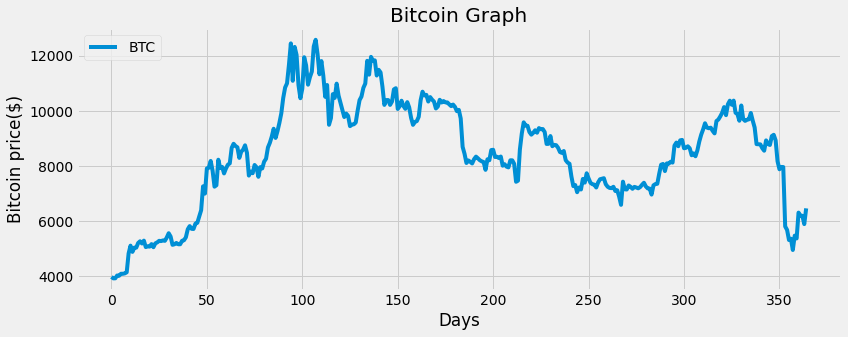

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.figure(figsize = (12.2, 4.5))
for c in df.columns.values:
  plt.plot(df[c], label = c)

plt.title('Bitcoin Graph')
plt.xlabel('Days')
plt.ylabel('Bitcoin price($)')
plt.legend(df.columns.values, loc = 'upper left')
plt.show()


In [10]:
# Setting a daily simple return in percentage
dsr = df.pct_change(1)
dsr

,BTC
0,NaN
1,-0.013773
2,0.000407
3,0.026362
4,-0.002543
...,...
360,0.174734
361,-0.018375
362,0.000287
363,-0.048927


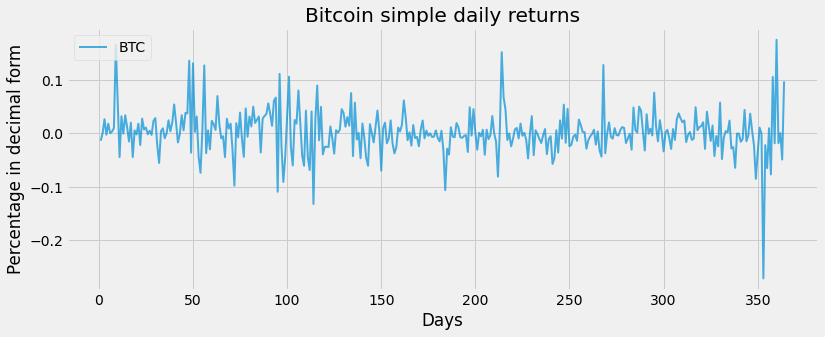

In [16]:
# Plotting the daily simple return
plt.figure(figsize=(12, 4.5))

for c in dsr.columns.values:
  plt.plot(dsr.index, dsr[c], label = c, lw = 2, alpha = .7)

plt.title('Bitcoin simple daily returns')
plt.xlabel('Days')
plt.ylabel('Percentage in decimal form')
plt.legend(dsr.columns.values, loc = 'upper left')
plt.show()

In [12]:
dsr.describe()

,BTC
count,364.000000
mean,0.002199
std,0.041339
min,-0.270901
25%,-0.015956
50%,0.000919
75%,0.019583
max,0.174734


In [13]:
# Setting daily cumulative simple returns
dcsr = (dsr+1).cumprod()
dcsr

,BTC
0,NaN
1,0.986227
2,0.986629
3,1.012638
4,1.010062
...,...
360,1.587794
361,1.558618
362,1.559065
363,1.482785


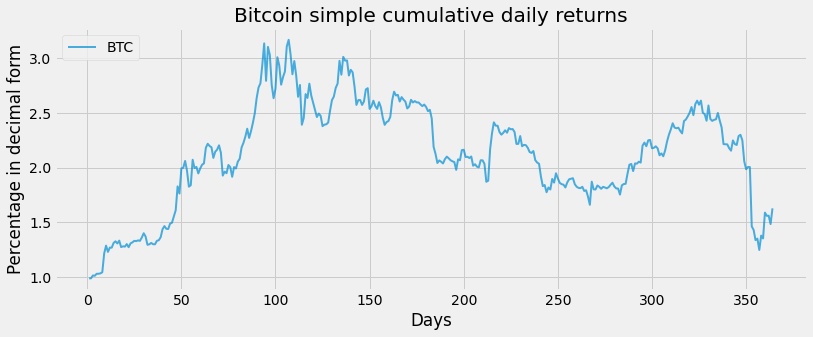

In [15]:
# Plotting the daily cumulative simple returns
plt.figure(figsize=(12, 4.5))
for c in dcsr.columns.values:
  plt.plot(dcsr.index, dcsr[c], label = c, lw = 2, alpha = .7)

plt.title('Bitcoin simple cumulative daily returns')
plt.xlabel('Days')
plt.ylabel('Percentage in decimal form')
plt.legend(dcsr.columns.values, loc = 'upper left')
plt.show()